# 패키지 설치


In [1]:
pip install langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.3 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langchain-core-0.3.15:
      Successfully uninstalled langchain-core-0.3.15


In [2]:
pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36


In [3]:
pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 6.2 MB/s eta 0:00:00


In [4]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 6.7 MB/s eta 0:00:00


# 개발 환경 googleColab

## 목차
***위 패키지 파일을 모두 설치 후 실행 권장***
1.  수동으로 API키를 입력한다.
2. 사용할 모델을 선택한다.
3. PDF파일을 업로드하여 자동으로 로드해준다.
4. 문서 청크로 나누기
5. 백터 임베딩 생성
6. 백터 스토어 생성
7. FAISS를 Retriever로 변환
8. 외부 프롬프트 템플릿 을 불러와 실행
 - 초기실행시 `10. 챗봇실행` 후 중단하면 `pronpts` 폴더 생성
9. RAG 체인 구성을 위한 유틸리티 클래스 및 구성
10. 챗봇 실행
  - `prompts`폴더에서 프롬포트1.2.3.txt파일을 참고하여 프롬포트 실행
  - 각 답변을 `Result`폴더에 저장
  - 사진 첨부

### 참고 사진

1. API_key입력

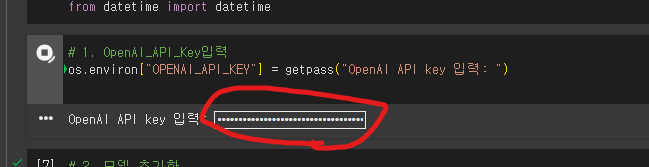


2. PDF파일 업로드
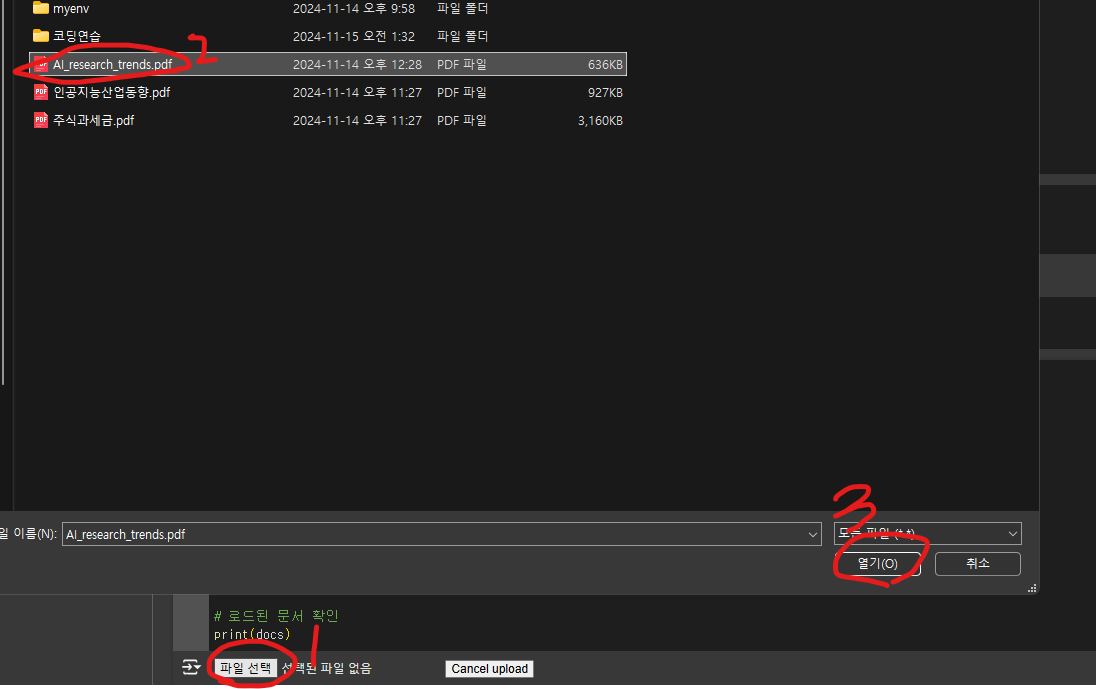

3. `prompt'폴더 `result`폴더 열기

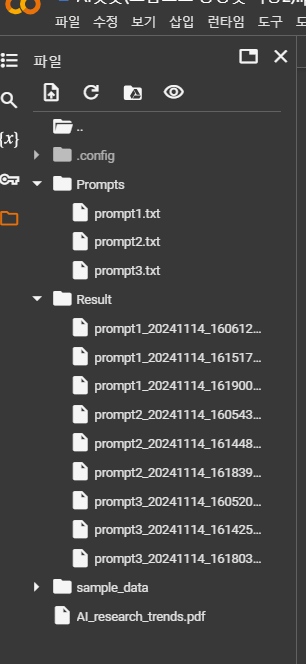


4. 챗봇 질문 입력

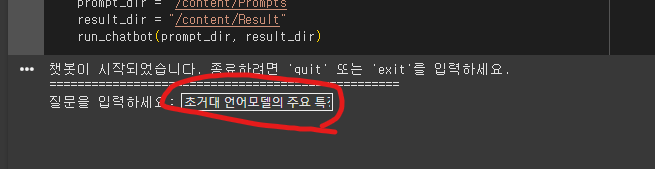

# 코드

In [5]:
import os
from google.colab import files
from getpass import getpass
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langchain_core.messages import HumanMessage
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from datetime import datetime

In [7]:
# 1. OpenAI_API_Key입력
os.environ["OPENAI_API_KEY"] = getpass("OpenAI API key 입력: ")


OpenAI API key 입력: ··········


In [8]:
# 2. 모델 초기화
model = ChatOpenAI(model="gpt-4-turbo-preview")

In [9]:
# 3. 파일 업로드 및 로드

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일 중 첫 번째 파일의 키(파일명)을 가져옴
file_name = next(iter(uploaded))

# 업로드된 파일 경로 지정
loader = PyPDFLoader(file_name)

# PDF 문서 로드
docs = loader.load()

# 로드된 문서 확인
print(docs)

Saving AI_research_trends.pdf to AI_research_trends.pdf
[Document(metadata={'source': 'AI_research_trends.pdf', 'page': 0}, page_content='8 특집원고  초거대 언어모델 연구 동향\n초거대 언어모델 연구 동향\n업스테이지  박찬준*･이원성･김윤기･김지후･이활석\n \n1. 서  론1)\nChatGPT1)와 같은 초거대 언어모델(Large Language \nModel, LLM) 의 등장으로 기존에 병렬적으로 연구되\n던 다양한 자연언어처리 하위 분야들이 하나의 모델\n로 처리되고 있으며, 태스크 수렴 현상 (Converge)이 \n발생하고 있다. 즉 하나의 LLM으로 번역, 요약, 질의\n응답, 형태소분석 등의 작업을 모두 처리할 수 있게 \n되었다. 프롬프트 (Prompt)를 어떻게 모델에게 입력하\n느냐에 따라서 LLM의 다양한 능력들이 창발되고, 이\n에 따라 사용자의 목적에 맞는 출력을 생성하는 패러\n다임을 맞이하게 되었다 [1].\nLLM은 최근 몇 년 간의 연구 동향에 따라 뛰어난 \n발전을 이루고 있다. 이러한 발전은 몇 가지 주요한 \n요인에 기반하고 있으며, 이 요인들은 현대 자연언어\n처리 (Natural Language Processing, NLP) 연구의 핵심\n적인 추세로 간주된다. 첫째로, 데이터의 양적 확대는 \n무시할 수 없는 중요한 요인이다. 디지털화의 선도로, \n텍스트 데이터의 양이 기하급수적으로 증가하였고, \n이는 연구의 질적 변화를 가져왔다. 대규모 코퍼스의 \n활용은 LLM의 일반화 능력을 향상시키며, 다양한 맥\n락과 주제에 대한 깊은 학습을 가능하게 한다. 둘째\n로, 컴퓨팅 기술의 진보는 LLM의 발전에 있어 결정\n적이었다. 특히, Graphics Processing Unit (GPU) 및 \nTensor Processing Unit (TPU) 와 같은 고성능 병렬 처\n리 하드웨어의 개발은 모델 학습에 

In [10]:
# 4. 문서 청크로 나누기
text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=100,
    chunk_overlap=10,
    length_function=len,
    is_separator_regex=False,
)
splits = text_splitter.split_documents(docs)

In [11]:
# 5. 벡터 임베딩 생성
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

In [12]:
# 6. 벡터 스토어 생성
from langchain.vectorstores import FAISS

vectorstore = FAISS.from_documents(documents=splits, embedding=embeddings)

In [13]:
# 7. FAISS를 Retriever로 변환
retriever = vectorstore.as_retriever(search_type="similarity", search_kwargs={"k": 1})

In [14]:
# 8. 프롬프트 템플릿 정의
def create_prompt_files(prompt_dir):
    if not os.path.exists(prompt_dir):
        os.makedirs(prompt_dir)

    prompt_files = ["prompt1.txt", "prompt2.txt", "prompt3.txt"]
    default_prompts = [
        "Context: {context}\n\nQuestion: {question}",
        "Context: {context}\n\nQuestion: {question}",
        "Context: {context}\n\nQuestion: {question}"
    ]

    for prompt_file, default_prompt in zip(prompt_files, default_prompts):
        prompt_path = os.path.join(prompt_dir, prompt_file)
        if not os.path.exists(prompt_path):
            with open(prompt_path, "w") as f:
                f.write(default_prompt)

def load_prompts(prompt_dir):
    prompt_templates = {}
    for prompt_file in os.listdir(prompt_dir):
        if prompt_file.endswith(".txt"):
            prompt_name = os.path.splitext(prompt_file)[0]
            with open(os.path.join(prompt_dir, prompt_file), "r") as f:
                prompt_text = f.read()
            prompt_templates[prompt_name] = ChatPromptTemplate.from_messages([
                ("system", "Answer the question using only the following context."),
                ("user", prompt_text)
            ])
    return prompt_templates

In [15]:
# 9. RAG 체인 구성을 위한 유틸리티 클래스들
class DebugPassThrough(RunnablePassthrough):
    def invoke(self, *args, **kwargs):
        output = super().invoke(*args, **kwargs)
        print("Debug Output:", output)
        return output

class ContextToText(RunnablePassthrough):
    def invoke(self, inputs, config=None, **kwargs):
        if isinstance(inputs["context"], str):
            return inputs
        context_text = "\n".join([doc.page_content for doc in inputs["context"]])
        return {"context": context_text, "question": inputs["question"]}

# RAG 체인 구성
def format_input(query):
    return {"question": query}

def create_rag_chain(prompt_template):
    return (
        {"context": retriever, "question": RunnablePassthrough()} |
        ContextToText() |
        prompt_template |
        model
    )


In [16]:
# 10. 챗봇 실행
def run_chatbot(prompt_dir, result_dir):
    create_prompt_files(prompt_dir)
    prompt_templates = load_prompts(prompt_dir)
    print("챗봇이 시작되었습니다. 종료하려면 'quit' 또는 'exit'를 입력하세요.")
    while True:
        print("=" * 50)
        query = input("질문을 입력하세요: ")

        if query.lower() in ['quit', 'exit']:
            print("챗봇을 종료합니다.")
            break

        for prompt_name, prompt_template in prompt_templates.items():
            rag_chain = create_rag_chain(prompt_template)
            try:
                response = rag_chain.invoke(query)
                print(f"\n{prompt_name} Response:")
                print(response.content)

                # 결과 저장
                os.makedirs(result_dir, exist_ok=True)
                timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
                result_file = os.path.join(result_dir, f"{prompt_name}_{timestamp}.txt")
                with open(result_file, "w") as f:
                    f.write(response.content)
                print(f"결과가 {result_file}에 저장되었습니다.")

            except Exception as e:
                print(f"오류가 발생했습니다: {str(e)}")

if __name__ == "__main__":
    prompt_dir = "/content/Prompts"
    result_dir = "/content/Result"
    run_chatbot(prompt_dir, result_dir)

챗봇이 시작되었습니다. 종료하려면 'quit' 또는 'exit'를 입력하세요.
질문을 입력하세요: 초거대 언어모델의 주요 특징은 무엇인가요

prompt3 Response:
초거대 언어모델(Large Language Model, LLM)의 주요 특징은 다음과 같습니다:

1. **다양한 자연언어처리 작업 수행**: 하나의 LLM으로 번역, 요약, 질의 응답, 형태소 분석 등 다양한 자연언어처리 작업을 처리할 수 있는 능력을 가지고 있습니다. 이는 태스크 수렴 현상으로 이어져, 여러 하위 분야의 연구가 하나의 모델로 통합되는 현상을 보여줍니다.

2. **프롬프트에 의한 창발적 능력**: 사용자가 입력하는 프롬프트(Prompt)에 따라 LLM이 다양한 능력을 발휘하며, 사용자의 목적에 맞는 출력을 생성할 수 있습니다. 이는 LLM을 매우 유연하고 다목적으로 활용할 수 있게 합니다.

3. **데이터와 컴퓨팅 기술의 발전에 의한 성장**: 대량의 텍스트 데이터와 고성능 병렬 처리 하드웨어(GPU, TPU 등), 그리고 알고리즘(특히 Attention 및 Transformer Architecture)의 발전이 LLM의 발전을 가능하게 했습니다.

4. **Scaling Law의 통찰**: 모델의 크기와 성능 사이에는 긍정적인 상관관계가 있으며, 이는 연구자들이 모델의 파라미터 수를 증가시키면서 성능을 향상시킬 수 있는 방향성을 제시합니다.

5. **산업계에서의 광범위한 활용 가능성**: 교육, 의료, 금융, 제조 등 거의 모든 산업 분야에서 LLM의 활용 가능성이 제시되고 있습니다. 이로 인해 LLM은 실제 세계의 많은 문제를 해결하는 데 있어 중요한 역할을 하고 있습니다.

이러한 특징들은 초거대 언어모델이 단순한 텍스트 처리를 넘어서, 복잡한 문제 해결과 다양한 산업 분야에서의 혁신적인 활용을 가능하게 하는 핵심 요소들입니다.
결과가 /content/Result/prompt3_20241115_031528.txt에 저장되었습니다.

prompt1 Response

# RAG가 필요한 이유

RAG는 텍스트 생성 모델에 외부 지식을 효과적으로 통합하기 위한 방법입니다. 기존의 생성 모델은 학습 데이터에 기반한 지식만을 활용하기 때문에, 학습 데이터에 없는 최신 정보나 특정 도메인의 전문 지식을 반영하기 어렵습니다. RAG는 이러한 한계를 극복하기 위해 다음과 같은 이점을 제공합니다:

- 최신 정보 반영: 외부 데이터베이스나 문서에서 최신 정보를 검색하여 생성 모델에 통합할 수 있습니다.

- 도메인 전문성 강화: 특정 도메인의 전문 지식을 포함한 문서를 검색하여 생성 결과의 정확성과 신뢰성을 높일 수 있습니다.

- 해석 가능성 향상: 생성 결과에 사용된 외부 지식을 추적할 수 있어, 모델의 출력이 더 해석 가능해집니다.

- 유연성 증가: 다양한 유형의 데이터 소스를 통합할 수 있어, 모델의 적용 범위가 확장됩니다.

따라서 RAG는 생성 모델의 성능을 향상시키고, 더 유익하고 정확한 정보를 제공하는 데 필수적인 기술입니다.